**Question 3**<br>
**Vehicle Position Estimation using Range Measurements**

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# True position of the vehicle
true_position = np.array([0.4, 0.8])

# Measurement noise range
measurement_noise_range = 0.3

# Range measurement model
def generate_range_measurement(landmark_position):
    """Generates a noisy range measurement to a landmark."""
    measured_range = (
        np.sqrt(np.sum((landmark_position - true_position) ** 2)) +
        np.random.normal(0, measurement_noise_range)
    )
    return measured_range

# Objective function for MAP estimator
def objective_function_estimate_position(position, landmark_positions, measured_ranges):
    """Computes the objective function value for the MAP estimator."""
    prior_term = np.sum((position - np.array([0, 0])) ** 2) / 2
    error_term = np.sum(
        (measured_ranges - np.sqrt(np.sum((landmark_positions - position) ** 2, axis=1))) ** 2
    )
    objective_value = prior_term + error_term
    return objective_value

# Sample a valid range measurement (ensuring non-negative values)
def sample_valid_range(landmark_position):
    """Samples a valid range measurement, ensuring it is non-negative."""
    while True:
        sample = generate_range_measurement(landmark_position)
        if sample >= 0:
            return sample

**Plotting the Objective Function Contour**

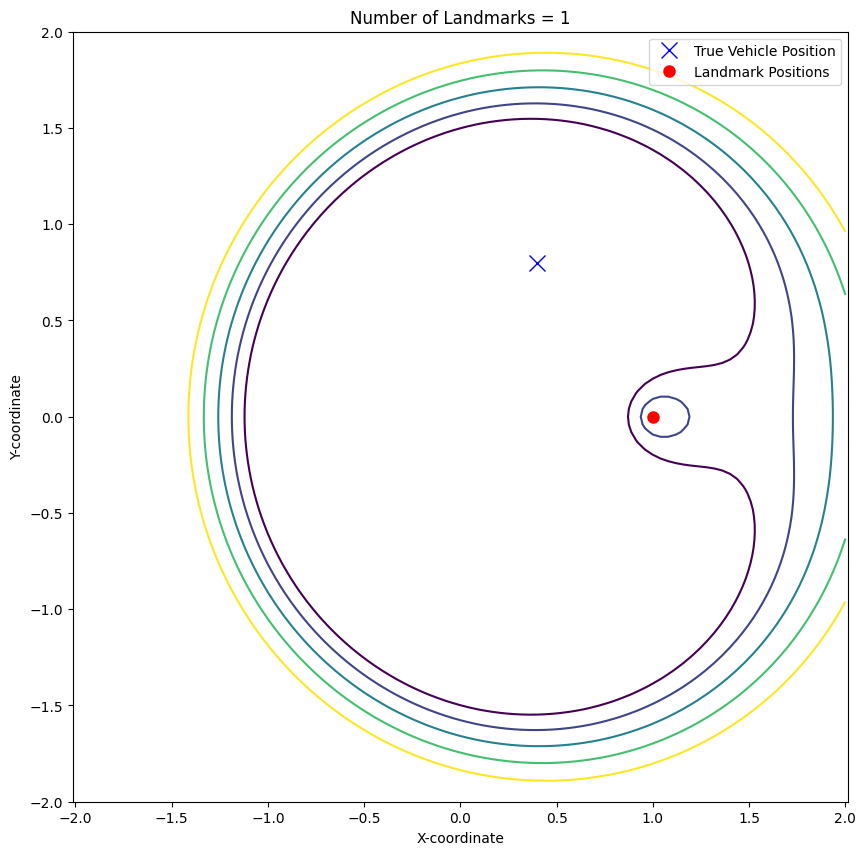

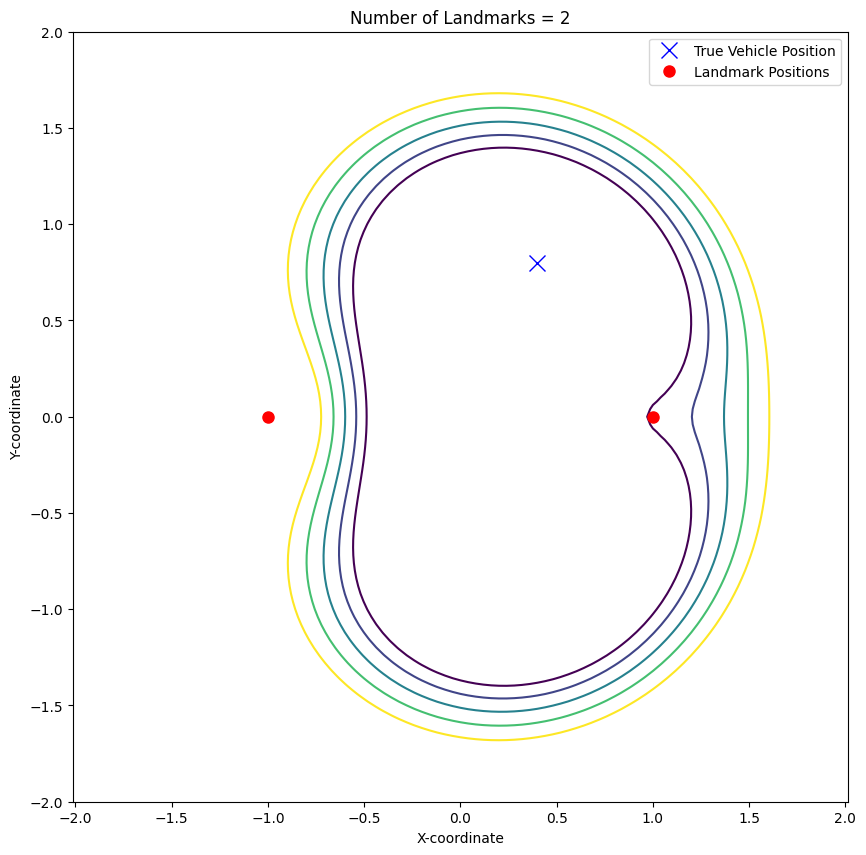

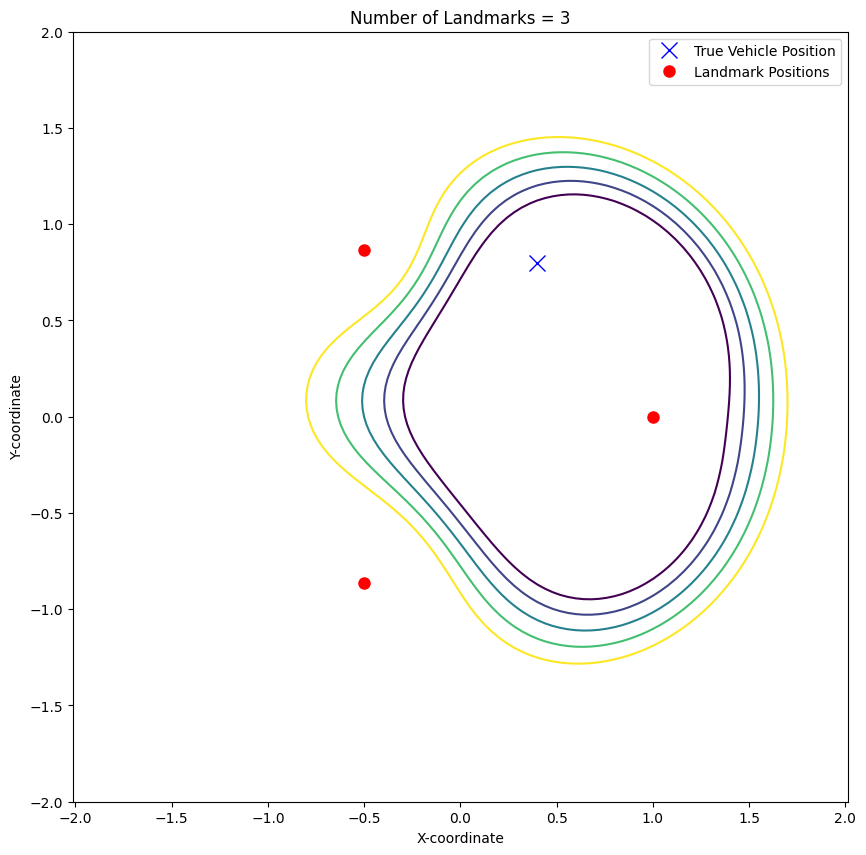

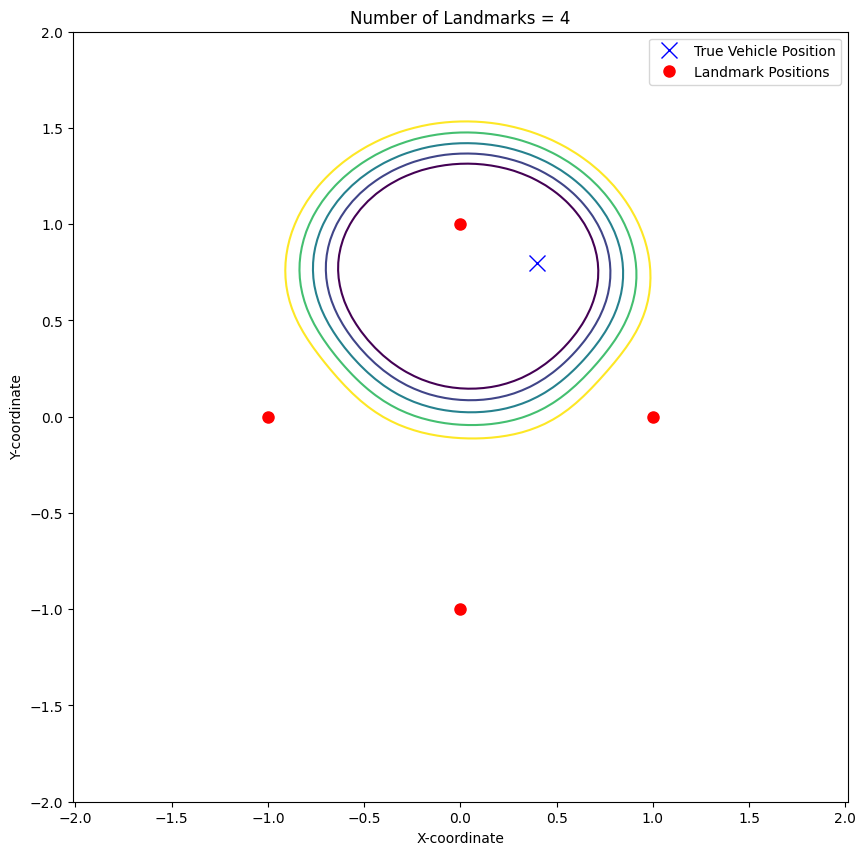

In [3]:
def plot_objective_function_contour(num_landmarks):
    """Plots contours of the objective function for vehicle position estimation."""

    # Place landmarks on a circle
    theta_values = np.linspace(0, 2 * np.pi, num_landmarks + 1)[:-1]
    landmark_positions = np.array([np.cos(theta_values), np.sin(theta_values)]).T

    # Generate range measurements
    measured_ranges = np.array([sample_valid_range(landmark) for landmark in landmark_positions])

    # Define ranges for coordinates
    x_range = y_range = np.linspace(-2, 2, 101)
    X, Y = np.meshgrid(x_range, y_range)
    Z = np.zeros_like(X)

    # Compute objective function values for each point in the grid
    for i in range(len(x_range)):
        for j in range(len(y_range)):
            position = np.array([x_range[i], y_range[j]])
            Z[j, i] = objective_function_estimate_position(position, landmark_positions, measured_ranges)

    # Plot contours of the objective function
    plt.figure(figsize=(10, 10))
    levels = np.logspace(np.log10(3 / 2), np.log10(5 / 2), 5)
    plt.contour(X, Y, Z, levels=levels)

    # Plot true vehicle position and landmark positions
    plt.plot(true_position[0], true_position[1], 'bx', markersize=12, label='True Vehicle Position')
    plt.plot(landmark_positions[:, 0], landmark_positions[:, 1], 'ro', markersize=8, label='Landmark Positions')

    # Set axis properties and labels
    plt.axis('equal')
    plt.legend()
    plt.title(f'Number of Landmarks = {num_landmarks}')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

# Plot contours for different numbers of landmarks
for num_landmarks in range(1, 5):
    plot_objective_function_contour(num_landmarks)